## SENTIMENT ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import nltk
nltk.download('vader_lexicon')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Loading and Previewing the datasets
merged_sentiments = pd.read_csv('MergedData/merged_sentiments.csv')
merged_sentiments

,text,date,No_of_likes,No_of_tweets
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10 10:12:00+00:00,0,1
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26 16:52:00+00:00,0,0
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12 15:18:00+00:00,27,7
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23 12:03:00+00:00,0,0
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28 07:07:00+00:00,0,0
...,...,...,...,...
585,Tusker? Maybe the beer. The beer should rightl...,2023-02-03 10:40:00+00:00,15,5
586,Tusker / EABL will never fall man 😂😂,2023-02-02 20:43:00+00:00,0,0
587,Wewe unakunywa pombe za EABL ama keroche's? Yo...,2023-01-31 23:27:00+00:00,1,0
588,Tusker FC Bank rolled: East African Breweries(...,2023-01-31 13:52:00+00:00,0,1


In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Fill any NaN values in the 'text' column with an empty string
merged_sentiments['text'].fillna('', inplace=True)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the entire 'text' column
merged_sentiments['compound'] = merged_sentiments['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Categorize sentiments based on the compound score
merged_sentiments['sentiment'] = merged_sentiments['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Display the updated dataset with sentiment scores and labels
merged_sentiments.head()

,text,date,No_of_likes,No_of_tweets,compound,sentiment
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10 10:12:00+00:00,0,1,0.0000,Neutral
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26 16:52:00+00:00,0,0,0.0000,Neutral
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12 15:18:00+00:00,27,7,-0.4215,Negative
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23 12:03:00+00:00,0,0,0.7644,Positive
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28 07:07:00+00:00,0,0,0.4404,Positive


The first two rows have a compound score of 0.0000, indicating a neutral sentiment. This means that these texts don't show a strong positive or negative sentiment. Neutral sentiments could be common for general comments or statements that do not express a clear opinion.

The third row has a compound score of -0.4215, categorizing it as a negative sentiment. This suggests that the text contains language conveying a pessimistic or critical tone. Negative sentiments in discussions about the company are important to monitor, as they could indicate concerns or issues that might impact the stock price negatively.

The fourth and fifth rows have positive compound scores (0.7644 and 0.4404), indicating a positive sentiment. These texts likely contain language expressing a favorable or optimistic view. Positive sentiments can be encouraging, suggesting positive sentiment in discussions around the company. This could be associated with potential positive impacts on stock prices.

It's essential to track the overall sentiment trends over time, as shifts in sentiment correlates with changes in stock prices. Therefore, monitoring sentiments can provide insights into public perception, potential market trends, and the impact of news or events on stock prices. It advised to consider aggregating sentiments over different time intervals to identify patterns and correlations with stock price movements.

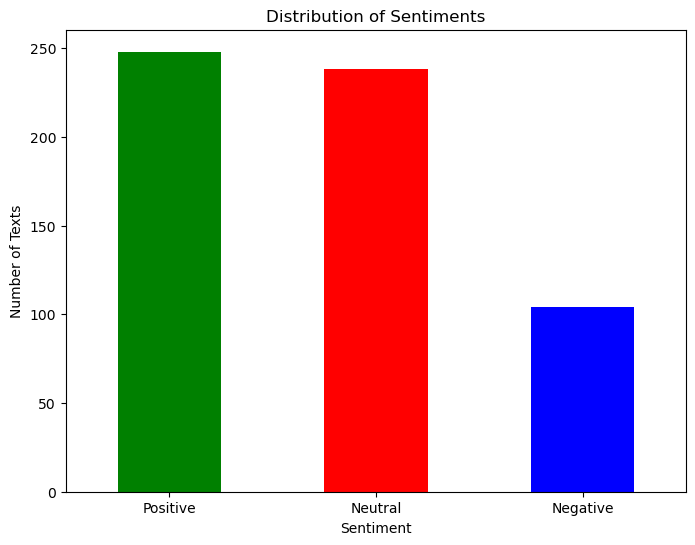

In [4]:

# Count the occurrences of each sentiment
sentiment_counts = merged_sentiments['sentiment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()

The largest portion of texts in your dataset is classified as positive sentiments. This indicates that a significant number of texts express positive opinions, feelings, or feedback related to East Africa Breweries Limited (EABL). It's encouraging to see a generally positive sentiment.

The neutral sentiments are nearly as prevalent as positive sentiments, suggesting a substantial number of texts that don't strongly lean towards either a positive or negative sentiment. Therefore, nderstanding the context of these neutral texts could provide additional insights into the overall sentiment landscape.

While negative sentiments form a smaller portion compared to positive and neutral sentiments. These texts may contain criticisms, concerns, or negative opinions about EABL. It's therefore essential to pay attention to them as investigating the content of these texts could help identify areas that might need attention or improvement.

The sentiment distribution provides an initial understanding of the sentiments expressed in the texts related to EABL stock. Further analysis, such as diving into the content of specific texts or exploring sentiment trends over time, could offer deeper insights for your stock price prediction project.

#### 2.  How sentiments change over time.

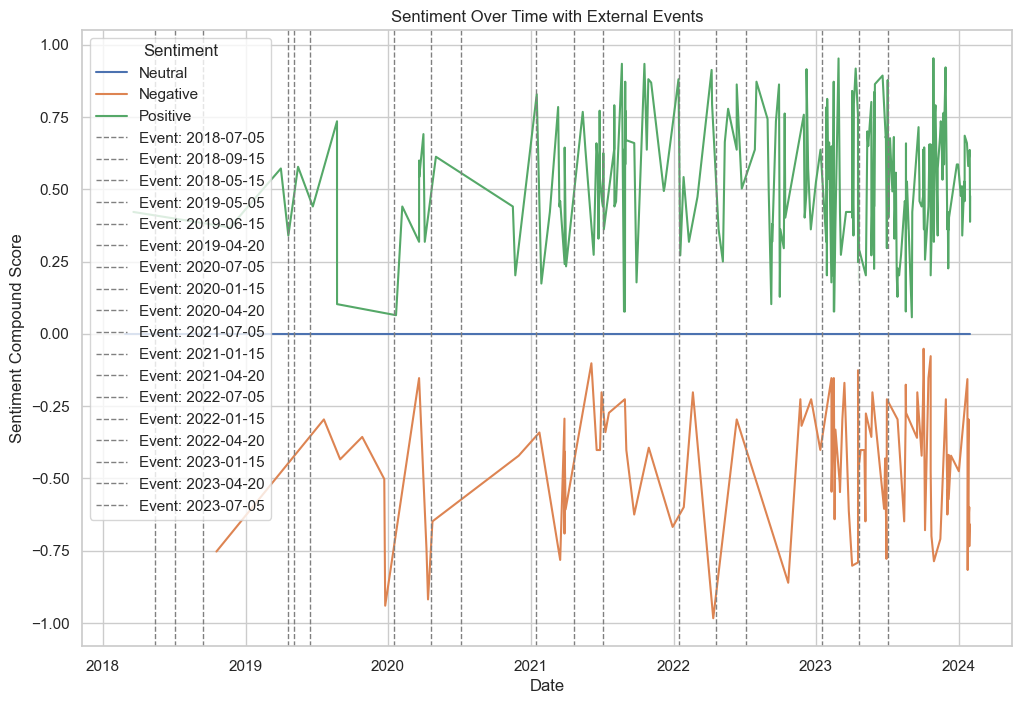

In [5]:
# 'key_dates' is a list of dates identified
key_dates = ['2018-07-05','2018-09-15', '2018-05-15',
             '2019-05-05','2019-06-15','2019-04-20',
             '2020-07-05','2020-01-15','2020-04-20',
             '2021-07-05','2021-01-15','2021-04-20',
             '2022-07-05','2022-01-15','2022-04-20',
             '2023-01-15', '2023-04-20', '2023-07-05']

# Convert 'date' column to datetime
merged_sentiments['date'] = pd.to_datetime(merged_sentiments['date'])

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting sentiment over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='compound', hue='sentiment', data=merged_sentiments)

# Annotate the plot with key dates
for key_date in key_dates:
    plt.axvline(pd.to_datetime(key_date), color='gray', linestyle='--', linewidth=1, label=f'Event: {key_date}')

# Customize the plot
plt.title('Sentiment Over Time with External Events')
plt.xlabel('Date')
plt.ylabel('Sentiment Compound Score')
plt.legend(title='Sentiment')
plt.show()

#### 3. Correlation with Engagement Metrics

Exploring if there's any correlation between sentiment scores and engagement metrics like 'No_of_likes' or 'No_of_tweets'.

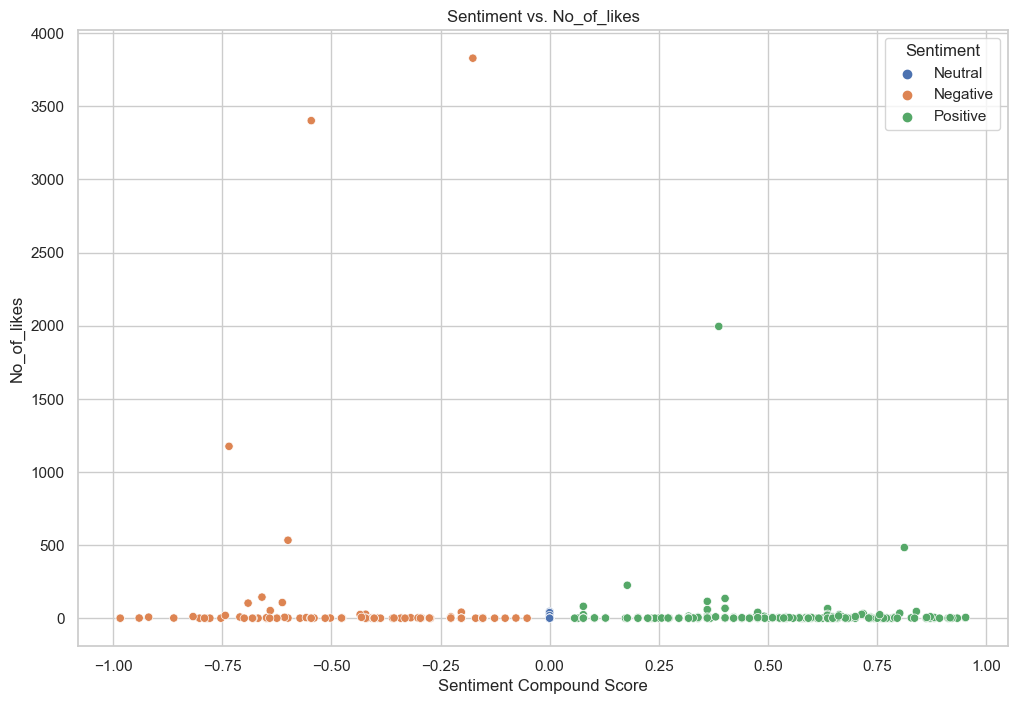

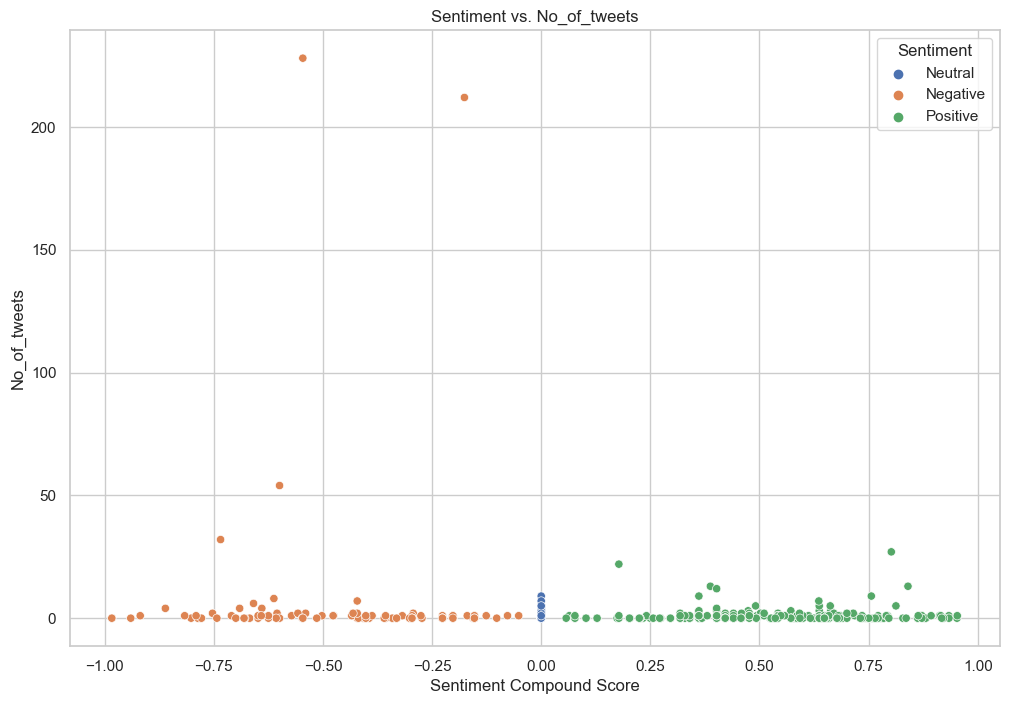

Correlation between Sentiment and No_of_likes: -0.07671733081742979
Correlation between Sentiment and No_of_tweets: -0.08411693897148358


In [6]:
# Set the style for the plot
sns.set(style="whitegrid")

# Scatter plot for sentiment vs. No_of_likes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='compound', y='No_of_likes', hue='sentiment', data=merged_sentiments)
plt.title('Sentiment vs. No_of_likes')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('No_of_likes')
plt.legend(title='Sentiment')
plt.show()

# Scatter plot for sentiment vs. No_of_tweets
plt.figure(figsize=(12, 8))
sns.scatterplot(x='compound', y='No_of_tweets', hue='sentiment', data=merged_sentiments)
plt.title('Sentiment vs. No_of_tweets')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('No_of_tweets')
plt.legend(title='Sentiment')
plt.show()

# Calculate correlation coefficients
correlation_likes = merged_sentiments['compound'].corr(merged_sentiments['No_of_likes'])
correlation_tweets = merged_sentiments['compound'].corr(merged_sentiments['No_of_tweets'])

print(f'Correlation between Sentiment and No_of_likes: {correlation_likes}')
print(f'Correlation between Sentiment and No_of_tweets: {correlation_tweets}')

The correlation coefficients are close to zero, indicating a weak linear relationship between sentiment scores and both 'No_of_likes' and 'No_of_tweets.'
The negative sign suggests a slight negative correlation, but the magnitude is small, indicating that as sentiment scores increase or decrease, there is a minimal impact on the number of likes or tweets.

Overall, these results suggest that there isn't a strong linear relationship between sentiment scores and engagement metrics in this dataset. Other factors or nonlinear relationships may contribute to the variations in likes and tweets.

#### 4. Word Clouds

Generate word clouds for each sentiment category to visualize the most frequent words associated with Positive, Negative, and Neutral sentiments.

Used the word cloud to visually  represent the text data, to display words in different sizes based on their frequency or importance. It provides a quick and intuitive way to identify the most prominent words in a given dataset.

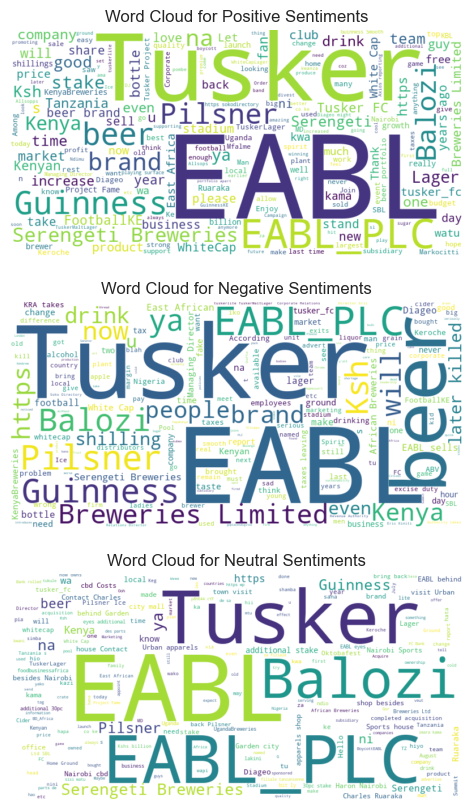

In [7]:
from wordcloud import WordCloud

# Separate texts for each sentiment category
positive_texts = merged_sentiments[merged_sentiments['sentiment'] == 'Positive']['text'].str.cat(sep=' ')
negative_texts = merged_sentiments[merged_sentiments['sentiment'] == 'Negative']['text'].str.cat(sep=' ')
neutral_texts = merged_sentiments[merged_sentiments['sentiment'] == 'Neutral']['text'].str.cat(sep=' ')

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)

# Plot word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiments')
plt.axis('off')

plt.show()